**CONTEXT:** A telecom company wants to use their historical customer data to predict behaviour to retain customers. You can 
analyse all relevant customer data and develop focused customer retention programs.







**DATA DESCRIPTION:** 
Each row represents a customer, each column contains customer’s attributes described on the column 
Metadata. The data set includes information about:

• Customers who left within the last month – the column is called Churn

• Services that each customer has signed up for – phone, multiple lines, internet, online security, online backup, device 
protection, tech support, and streaming TV and movies

• Customer account information – how long they’ve been a customer, contract, payment method, paperless billing, monthly 
charges, and total charges

• Demographic info about customers – gender, age range, and if they have partners and dependents





**PROJECT OBJECTIVE:** Build a model that will help to identify the potential customers who have a higher probability to churn. 
This help the company to understand the pinpoints and patterns of customer churn and will increase the focus on strategising 
customer retention.

**Importing Libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings as warn
warn.filterwarnings("ignore")
sns.set_style(style='darkgrid')
import statistics as stats
import time

**Data Loading**

In [2]:
data1=pd.read_csv('TelcomCustomer-Churn_1.csv')
data2=pd.read_csv('TelcomCustomer-Churn_2.csv')
data=pd.concat([data1,data2],join='outer',axis=1,)
print('Churn Dataset 1 shape =',data1.shape[0])
print('Churn Dataset 2 shape =',data2.shape[0])
print('Churn Dataset Final shape =',data.shape[0])
print('Total Columns of Churn Dataset 1 = ',data1.shape[1])
print('Total Columns of Churn Dataset 2 = ',data2.shape[1])
print('Total Columns of Final Dataset = ',data.shape[1])

Churn Dataset 1 shape = 7043
Churn Dataset 2 shape = 7043
Churn Dataset Final shape = 7043
Total Columns of Churn Dataset 1 =  10
Total Columns of Churn Dataset 2 =  11
Total Columns of Final Dataset =  21


In [3]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
#Datatype of labels
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


**Data Cleaning**

In [5]:
#Dropping the ID Column as it does not have any signifance for our analysis
data.drop(columns='customerID',inplace=True)

In [6]:
# Finding the column in the dataset having blank values
for col in data.columns:
  if (data[(data[col]==' ')|(data[col]=='')].shape[0]>1):
    print(col,"contains Blank rows")


TotalCharges contains Blank rows


In [7]:
#I can change the Nan values to either 0 or any of Mean,Median or Mode, since this column contains data as continuous type
# so i chose 0
data.replace(to_replace=' ',value='0',inplace=True)
data['TotalCharges']=data['TotalCharges'].astype('float64')

**Data Analysis & Visualisation**

In [8]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,7043.0,0.162147,0.368612,0.00,0.00,0.00,0.00,1.00
tenure,7043.0,32.371149,24.559481,0.00,9.00,29.00,55.00,72.00
MonthlyCharges,7043.0,64.761692,30.090047,18.25,35.50,70.35,89.85,118.75
TotalCharges,7043.0,2279.734304,2266.794470,0.00,398.55,1394.55,3786.60,8684.80


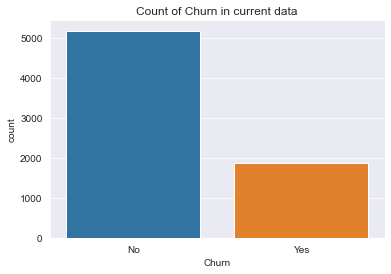

In [9]:
#Finding the churn
ax1=sns.countplot(data=data,x='Churn')
ax1.set_title('Count of Churn in current data');

**From the count of Churn, we can state that the number of customers leaving the company are less.**

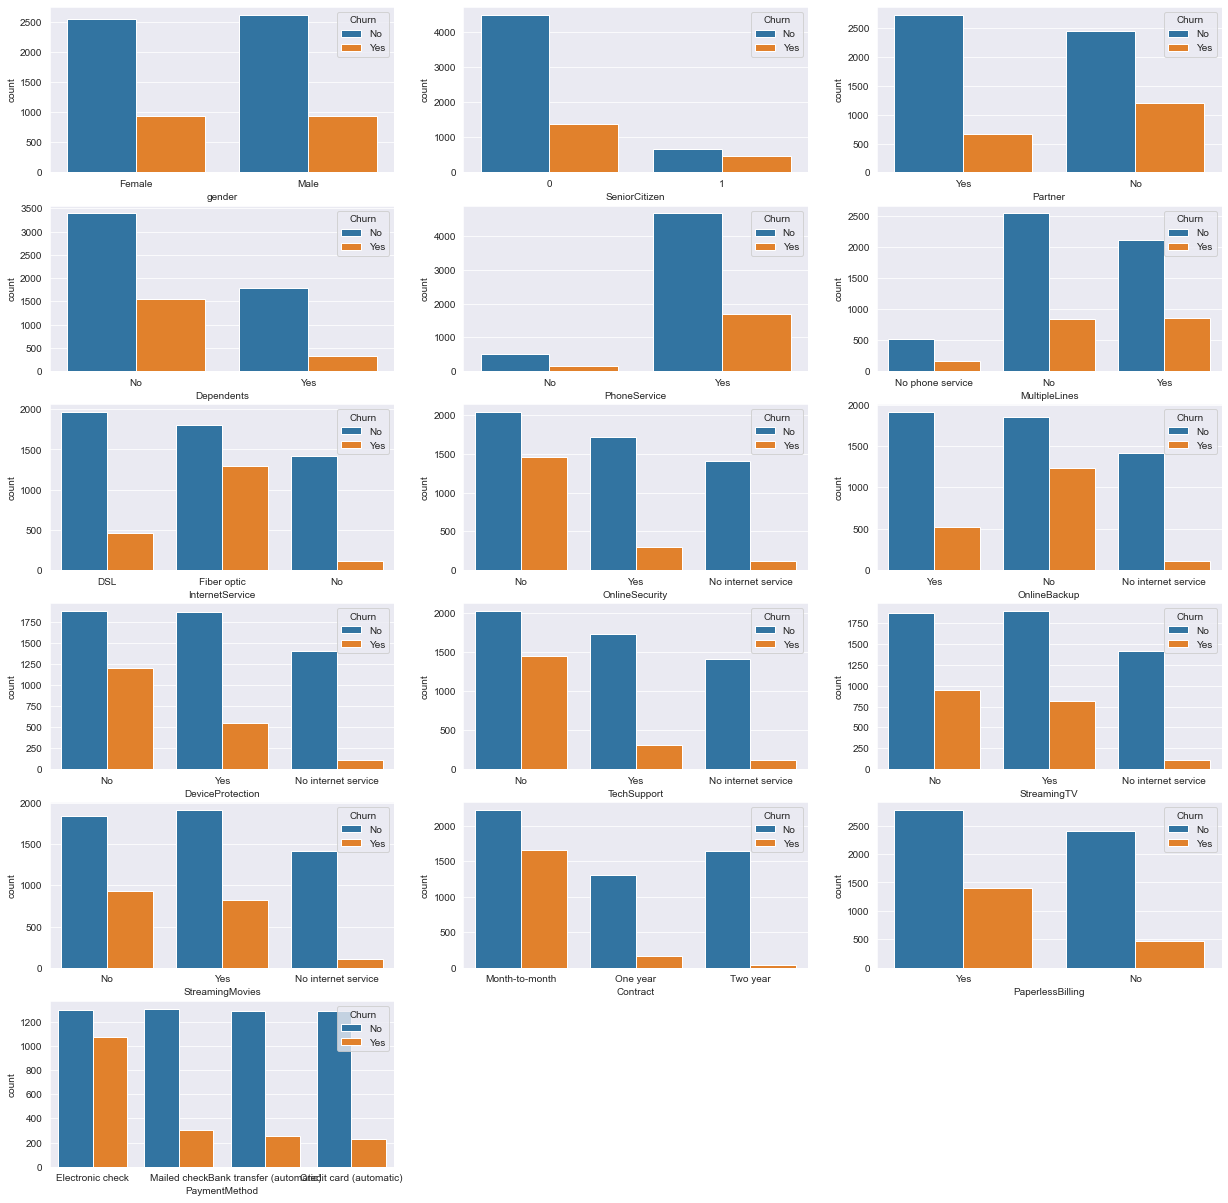

In [10]:
col_for_analysis=['gender','SeniorCitizen',"Partner","Dependents","PhoneService","MultipleLines","InternetService",
                  "OnlineSecurity","OnlineBackup","DeviceProtection","TechSupport","StreamingTV","StreamingMovies",
                  "Contract","PaperlessBilling","PaymentMethod"]
plt.figure(figsize=(21,25))
for fig in range(len(col_for_analysis)):
    plt.subplot(7,3,fig+1)
    ax=sns.countplot(data=data,hue='Churn',x=col_for_analysis[fig])


**We can draw following conclusions from the above graphs:**

1. There are more number of Male customers than the Female customers
2. The number of Male Customers leaving the Company is more than the number of Female Customers leaving the company.
3. There are very less customers who are senior citizens.
4. Most of the customers have partners.
5. The customers who do not have a partner are more likely to leave the company.
6. Most of the customers are not having dependents.
7. The Customers not having dependents are more likely to leave the company.
8. The Customers who have opted for Phone service are more in number.
9. The number of Customers with Phone Service leaving company are less.
10. There are a majority of Customers who do not have a MultipleLines.
11. Maximum customers leaving the Company are the ones who have MultipleLines in comapared to the ones who do not have and the ones who do not have a phone service.
12. Most Favorite method of internet service enjoyed by customers is DSL.
13. The customers who have opted for the FiberOptic Method for their internet service are more likely to leave the company.
14. Most of the customers have not opted for the Online Security.
15. The Customers who have not opted for Online Security are the ones who are more likely to leave the company.
16. Most of the customers have opted for the Online Backup.
17. The Customers who have not opted for Online Security are the ones who are more likely to leave the company.
18. Most of the customers have not opted for the Device protection.
19. The Customers who have not opted for Device protection are the ones who are more likely to leave the company.
20. Most of the customers have not opted for the Tech support.
21. The Customers who have not opted for Tech support are the ones who are more likely to leave the company and the customers who have taken Tech support seem to be satisfied and they are less likely to leave.
22. Most of the consumers have opted for TV Streaming service.
23. The customers who have not opted for TV streaming service are more likely to leave.
24. Most of the consumers have opted for Streaming Movies service.
25. The customers who have not opted for Streaming Movies service are more likely to leave.
26. Maximum number of people have opted for Monthly service and maximum customers who are leaving are the ones who have taken Monthly service.
27. Most of the customers go for Paperless Billing.
28. The most popular payment method is through Electronic check and this seems to be most popular category in which customers have left.


Mean for churn customers 74.4413322632423
Maximum Monthly charge for churn customers 118.35
Minimum Monthly charge for churn customers 18.85
Mean for non-churn customers 61.2651236953999
Maximum Monthly charge for non_churn customers 118.75
Minimum Monthly charge for non_churn customers 18.25


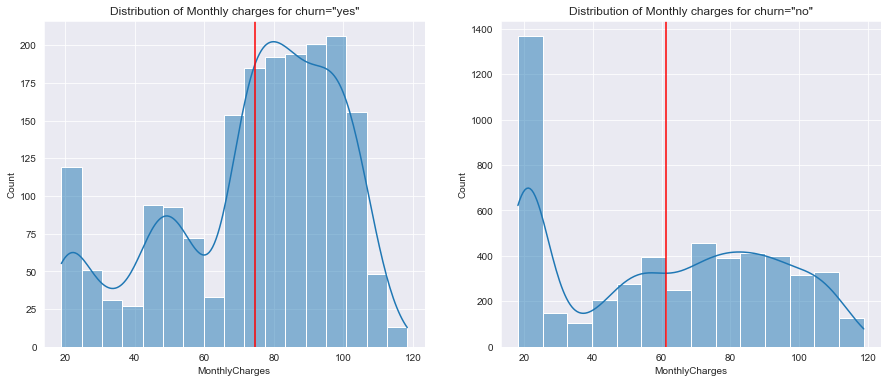

In [11]:
churn=data[data['Churn']=='Yes'] #Customers leaving the company
no_churn=data[data['Churn']=='No'] #Customers not leaving the company
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
ax=sns.histplot(data=churn,x='MonthlyCharges',kde=True);
ax.set_title('Distribution of Monthly charges for churn="yes"');
plt.axvline(churn['MonthlyCharges'].mean(),0,1,color='red');
plt.subplot(1,2,2)
ax=sns.histplot(data=no_churn,x='MonthlyCharges',kde=True);
ax.set_title('Distribution of Monthly charges for churn="no"');
plt.axvline(no_churn['MonthlyCharges'].mean(),0,1,color='red');
print("Mean for churn customers",churn['MonthlyCharges'].mean())
print("Maximum Monthly charge for churn customers",churn['MonthlyCharges'].max())
print("Minimum Monthly charge for churn customers",churn['MonthlyCharges'].min())
print("Mean for non-churn customers",no_churn['MonthlyCharges'].mean())
print("Maximum Monthly charge for non_churn customers",no_churn['MonthlyCharges'].max())
print("Minimum Monthly charge for non_churn customers",no_churn['MonthlyCharges'].min())

**We can draw following conclusions for Monthly charges:**

**For Churn="Yes"**
1. The average Monthly charge is around 74 
2. Maximum monthly charge for customer is around 118
3. Most frequent monthly charge is around 74.
4. Distribution is right skewed


**For Churn="No"**
1. The average Monthly charge is around 64 
2. Minimum monthly charge for customer is around 20
3. Most frequent monthly charge is around 20.
4. The maximum monthly charge is 118
5. Distribution is right skewed

Mean for churn customers 1531.7960941680035
Maximum Total charge for churn customers 8684.8
Minimum Total charge for churn customers 18.85
Mean for non-churn customers 2549.911441824514
Maximum Total charge for non_churn customers 8672.45
Minimum Total charge for non_churn customers 0.0
variance for churned customers 3575211.596395336
variance for non-churned customers 5428686.6458501145


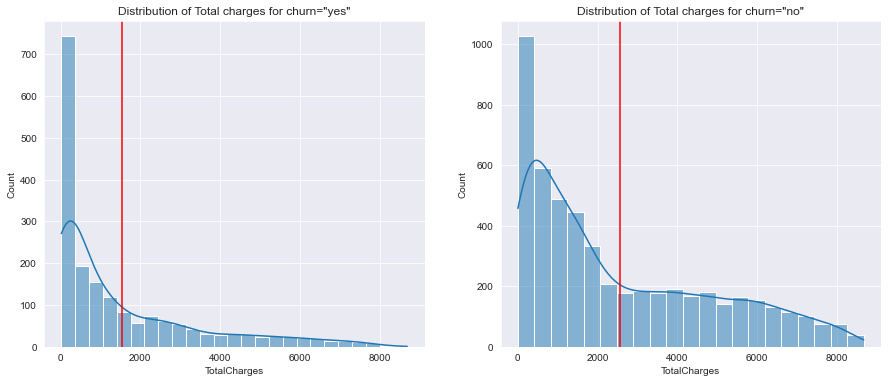

In [12]:
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
ax=sns.histplot(data=churn,x='TotalCharges',kde=True);
ax.set_title('Distribution of Total charges for churn="yes"');
plt.axvline(churn['TotalCharges'].mean(),0,1,color='red');
plt.subplot(1,2,2)
ax=sns.histplot(data=no_churn,x='TotalCharges',kde=True);
ax.set_title('Distribution of Total charges for churn="no"');
plt.axvline(no_churn['TotalCharges'].mean(),0,1,color='red');
print("Mean for churn customers",churn['TotalCharges'].mean())
print("Maximum Total charge for churn customers",churn['TotalCharges'].max())
print("Minimum Total charge for churn customers",churn['TotalCharges'].min())
print("Mean for non-churn customers",no_churn['TotalCharges'].mean())
print("Maximum Total charge for non_churn customers",no_churn['TotalCharges'].max())
print("Minimum Total charge for non_churn customers",no_churn['TotalCharges'].min())
print("variance for churned customers",stats.variance(churn['TotalCharges'].values))
print("variance for non-churned customers",stats.variance(no_churn['TotalCharges'].values))

**We can draw following conclusions for Total charges:**

**For Churn="Yes"**
1. The average Total charge is around 1532 
2. Maximum total charge for customer is around 8684.8
3. The maximum total charge is 18
4. Distribution is right skewed

**For Churn="No"**
1. The average Total charge is around 2550
2. Minimum total charge for customer is 0
3. Maximum total charge is around 8672.45
4. Distribution is right skewed

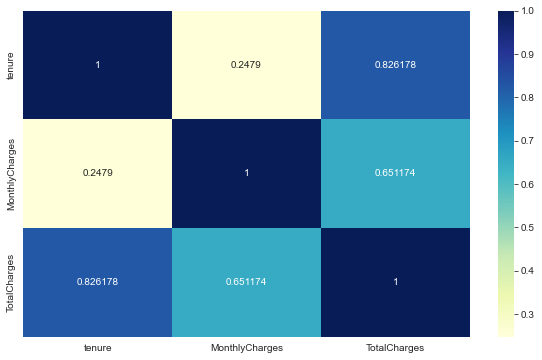

In [13]:
#Finding the correlation in the dataset
plt.figure(figsize=(10,6))
data_for_corr=data.drop(columns=['SeniorCitizen'])
sns.heatmap(data_for_corr.corr(),annot=True,fmt='g',cmap="YlGnBu");

**Correlation Analysis**
* We can say that the tenure,monthlycharge and totalcharges are highly correlated that is we can say that changing one factor will change the other two factors ,so we have to drop 1 column for our model making as it will overfit the model and will cause the Model to perform badly in our test data.
So by rough estimate we drop Totalcharge as correlation for this column is nearer to 1

In [14]:
data=data.drop(columns=['TotalCharges'],axis=1)

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


**Categorical columns values count**

In [16]:
print(data.gender.value_counts())
print(data.SeniorCitizen.value_counts())
print(data.Partner.value_counts())
print(data.Dependents.value_counts())
print(data.PhoneService.value_counts())
print(data.MultipleLines.value_counts())
print(data.InternetService.value_counts())
print(data.OnlineSecurity.value_counts())
print(data.OnlineBackup.value_counts())
print(data.DeviceProtection.value_counts())
print(data.TechSupport.value_counts())
print(data.StreamingTV.value_counts())
print(data.StreamingMovies.value_counts())
print(data.Contract.value_counts())
print(data.PaperlessBilling.value_counts())
print(data.PaymentMethod.value_counts())
print(data.Churn.value_counts())

Male      3555
Female    3488
Name: gender, dtype: int64
0    5901
1    1142
Name: SeniorCitizen, dtype: int64
No     3641
Yes    3402
Name: Partner, dtype: int64
No     4933
Yes    2110
Name: Dependents, dtype: int64
Yes    6361
No      682
Name: PhoneService, dtype: int64
No                  3390
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64
Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64
No                     3498
Yes                    2019
No internet service    1526
Name: OnlineSecurity, dtype: int64
No                     3088
Yes                    2429
No internet service    1526
Name: OnlineBackup, dtype: int64
No                     3095
Yes                    2422
No internet service    1526
Name: DeviceProtection, dtype: int64
No                     3473
Yes                    2044
No internet service    1526
Name: TechSupport, dtype: int64
No                     2810
Yes                

**Data Pre-processing**

In [17]:
#Dealing with categorical values
for feature in data.columns:
  if data[feature].dtype=='object':
    data[feature]=pd.Categorical(data[feature]) 
#Transforms the object columns to Categorical columns. 
#This doesn't change any value in the column just classifies data into different categories.

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   gender            7043 non-null   category
 1   SeniorCitizen     7043 non-null   int64   
 2   Partner           7043 non-null   category
 3   Dependents        7043 non-null   category
 4   tenure            7043 non-null   int64   
 5   PhoneService      7043 non-null   category
 6   MultipleLines     7043 non-null   category
 7   InternetService   7043 non-null   category
 8   OnlineSecurity    7043 non-null   category
 9   OnlineBackup      7043 non-null   category
 10  DeviceProtection  7043 non-null   category
 11  TechSupport       7043 non-null   category
 12  StreamingTV       7043 non-null   category
 13  StreamingMovies   7043 non-null   category
 14  Contract          7043 non-null   category
 15  PaperlessBilling  7043 non-null   category
 16  PaymentMethod     7043 n

In [18]:
new_Categorical_data={
    "Churn":{"No":0,"Yes":1}
    }

data=data.replace(new_Categorical_data)

colsToEncode=[]
for feature in data.columns:
  if data[feature].dtype=='object':
    colsToEncode.append(feature)
  elif data[feature].dtype!='int64' and data[feature].dtype!='float64':
    colsToEncode.append(feature)

#getting dummies for the remaining columns 
data=pd.get_dummies(data,columns=colsToEncode)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 45 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   SeniorCitizen                            7043 non-null   int64  
 1   tenure                                   7043 non-null   int64  
 2   MonthlyCharges                           7043 non-null   float64
 3   Churn                                    7043 non-null   int64  
 4   gender_Female                            7043 non-null   uint8  
 5   gender_Male                              7043 non-null   uint8  
 6   Partner_No                               7043 non-null   uint8  
 7   Partner_Yes                              7043 non-null   uint8  
 8   Dependents_No                            7043 non-null   uint8  
 9   Dependents_Yes                           7043 non-null   uint8  
 10  PhoneService_No                          7043 no

**Splitting,Testing and training data**

In [19]:
from sklearn.model_selection import train_test_split
X=data.drop(columns='Churn',axis=1)
y=data.pop('Churn')
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=40)
print("Training data size=",X_train.shape[0])
print("Testing data size=",X_test.shape[0])

Training data size= 4930
Testing data size= 2113


We will build following model and test the accuracy for the same dataset and then conclude the best possible model 

1. Decision Tree
2. Bagging Classifier
3. Adaboosting
4. Gradientboosting
5. Random forest

**Model training, testing and tuning**

**1. Decision Tree Model**

In [20]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
tree1=DecisionTreeClassifier(criterion='gini',max_depth=3,max_leaf_nodes=2,)
# store starting time
begin = time.time()
tree1.fit(X_train,y_train)
# store end time
end = time.time()
model1Time=np.round((end-begin),6)
train_score1=np.round(tree1.score(X_train,y_train),6)
test_score1=np.round(tree1.score(X_test,y_test),6)
print("Training Score",train_score1)
print("Test Score",test_score1)
# total time taken
print("Total runtime of the Model fitting is",model1Time)

Training Score 0.734483
Test Score 0.734974
Total runtime of the Model fitting is 0.015625


**2. Bagging Model**


In [21]:
from sklearn.ensemble import BaggingClassifier
tree2=BaggingClassifier(n_estimators=20,max_features=10,)
# store starting time
begin = time.time()
tree2.fit(X_train,y_train)
# store end time
end = time.time()
model2Time=np.round((end-begin),6)
train_score2=np.round(tree2.score(X_train,y_train),6)
test_score2=np.round(tree2.score(X_test,y_test),6)
print("Training Score",train_score2)
print("Test Score",test_score2)
# total time taken
print("Total runtime of the Model fitting is",model2Time)

Training Score 0.911156
Test Score 0.769522
Total runtime of the Model fitting is 0.111764


**3. Adaptive boosting**

In [22]:
from sklearn.ensemble import AdaBoostClassifier
tree3=AdaBoostClassifier(n_estimators=20,learning_rate=0.3)
# store starting time
begin = time.time()
tree3.fit(X_train,y_train)
# store end time
end = time.time()
model3Time=np.round((end-begin),6)
train_score3=np.round(tree3.score(X_train,y_train),6)
test_score3=np.round(tree3.score(X_test,y_test),6)
print("Training Score",train_score3)
print("Test Score",test_score3)
# total time taken
print("Total runtime of the Model fitting is",model3Time)

Training Score 0.805274
Test Score 0.791765
Total runtime of the Model fitting is 0.113095


**4. Gradient Boosting**

In [23]:
from sklearn.ensemble import GradientBoostingClassifier
tree4=GradientBoostingClassifier(n_estimators=20,learning_rate=0.3)
# store starting time
begin = time.time()
tree4.fit(X_train,y_train)
# store end time
end = time.time()
model4Time=np.round((end-begin),6)
train_score4=np.round(tree4.score(X_train,y_train),6)
test_score4=np.round(tree4.score(X_test,y_test),6)
print("Training Score",train_score4)
print("Test Score",test_score4)
# total time taken
print("Total runtime of the Model fitting is",model4Time)

Training Score 0.82211
Test Score 0.792239
Total runtime of the Model fitting is 0.174752


**5. Random Forest**

In [24]:
from sklearn.ensemble import RandomForestClassifier
tree5=RandomForestClassifier(n_estimators=20,criterion="gini",max_depth=8,max_leaf_nodes=2)
# store starting time
begin = time.time()
tree5.fit(X_train,y_train)
# store end time
end = time.time()
model5Time=np.round((end-begin),6)
train_score5=np.round(tree5.score(X_train,y_train),6)
test_score5=np.round(tree5.score(X_test,y_test),6)
print("Training Score",train_score1)
print("Test Score",test_score5)
# total time taken
print("Total runtime of the Model fitting is",model5Time)

Training Score 0.734483
Test Score 0.734974
Total runtime of the Model fitting is 0.055996


**Analysis of Models, ModelScore and Time required by each model to fit.**

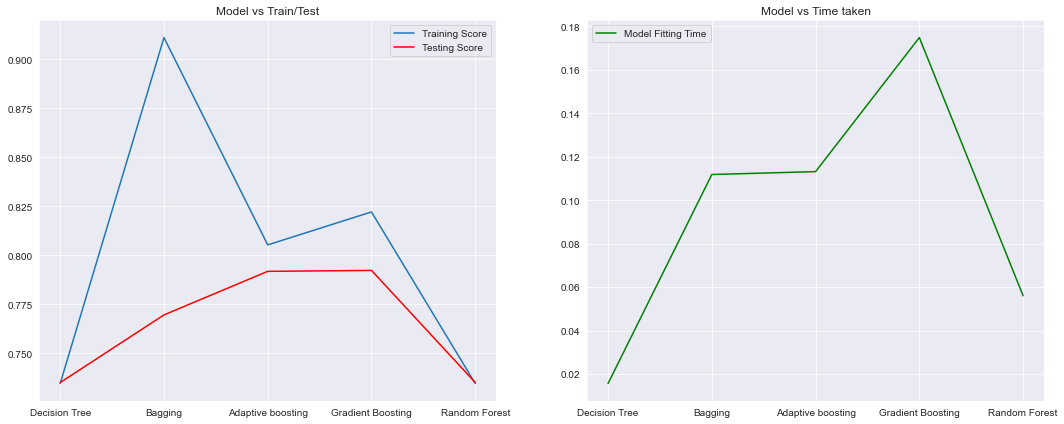

In [25]:
#Store the accuracy results for each model in a dataframe for final comparison
results = pd.DataFrame({'Model':['Decision Tree','Bagging','Adaptive boosting','Gradient Boosting','Random Forest'],
                        'TrainSetScore': [train_score1,train_score2,train_score3,train_score4,train_score5],
                        'TestSetScore':[test_score1,test_score2,test_score3,test_score4,test_score5],
                        'ModelFittingTime':[model1Time,model2Time,model3Time,model4Time,model5Time]})
f=plt.figure()
f.set_figwidth(18)
f.set_figheight(7)
plt.subplot(1,2,1)
plt.plot(results['Model'],results['TrainSetScore'],label = "Training Score");
plt.plot(results['Model'],results['TestSetScore'],color='r',label = "Testing Score",);
plt.title('Model vs Train/Test')
plt.legend()
plt.subplot(1,2,2)
plt.plot(results['Model'],results['ModelFittingTime'],color='green',label = "Model Fitting Time");
plt.title('Model vs Time taken')
plt.legend()
plt.show()

**We can deduct following points from the above plots**

1. If we consider the most time effiecient model, Decision Tree and Random Forest performs the best among all the models as it takes least model training time.
2. Time elapsed by the Gradient Boosting Model is the largest among all 5 models considered.
3. Bagging Model is clearly overfit as evident from the gap between the train and test data score.
4. Both the Decison Tree as well as Random Forest gives almost equal score but the time elapsed by Decision Tree to fit the data is the less as compared to the Random Forest. 
5. In the Boosting Model we have considered Gradient model gives better result as compared to the Adaptive boosting. 

**Columns to be considered for Feature selection**

In [26]:
data1=pd.DataFrame(tree1.feature_importances_,index=X_train.columns,columns=["Importance"])
data3=pd.DataFrame(tree3.feature_importances_,index=X_train.columns,columns=["Importance"])
data4=pd.DataFrame(tree4.feature_importances_,index=X_train.columns,columns=["Importance"])
data5=pd.DataFrame(tree5.feature_importances_,index=X_train.columns,columns=["Importance"])
print("Decision Tree ")
print(data1[data1['Importance']>0.0])
print("\n")
print("Adaboosting ")
print(data3[data3['Importance']>0.0])
print("\n")
print("Gradient Boost")
print(data4[data4['Importance']>0.0])
print("\n")
print("Random Forest ")
print(data5[data5['Importance']>0.0])

Decision Tree 
                         Importance
Contract_Month-to-month         1.0


Adaboosting 
                                      Importance
tenure                                      0.35
InternetService_Fiber optic                 0.15
OnlineSecurity_No                           0.05
DeviceProtection_No internet service        0.05
TechSupport_No                              0.05
StreamingTV_Yes                             0.05
StreamingMovies_Yes                         0.05
Contract_Month-to-month                     0.10
Contract_Two year                           0.05
PaperlessBilling_No                         0.05
PaymentMethod_Electronic check              0.05


Gradient Boost
                                       Importance
SeniorCitizen                            0.004555
tenure                                   0.203718
MonthlyCharges                           0.068141
gender_Male                              0.000860
Dependents_No                            0.

**Confusion Matrix and Classification Report**

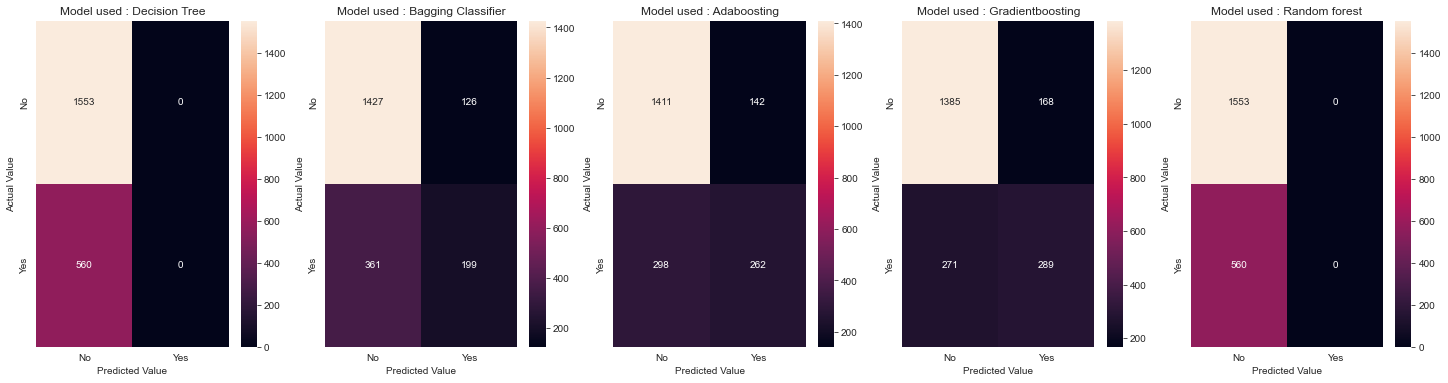

In [27]:
from sklearn.metrics import classification_report,recall_score,precision_score,accuracy_score,confusion_matrix
#Confusion matrix for Decision Tree
y_pred1=tree1.predict(X_test)
cm1=confusion_matrix(y_test,y_pred1)
df_cm1=pd.DataFrame(cm1)


#Confusion matrix for Bagging Classifier
y_pred2=tree2.predict(X_test)
cm2=confusion_matrix(y_test,y_pred2)
df_cm2=pd.DataFrame(cm2)


#Confusion matrix for Adaboosting
y_pred3=tree3.predict(X_test)
cm3=confusion_matrix(y_test,y_pred3)
df_cm3=pd.DataFrame(cm3)


#Confusion matrix for Gradientboosting
y_pred4=tree4.predict(X_test)
cm4=confusion_matrix(y_test,y_pred4)
df_cm4=pd.DataFrame(cm4)

#Confusion matrix for 
y_pred5=tree5.predict(X_test)
cm5=confusion_matrix(y_test,y_pred5)
df_cm5=pd.DataFrame(cm5)


#Figure size
plt.figure(figsize=(25,6))

#Model 1
plt.subplot(1,5,1)
plt.title('Model used : Decision Tree');
ax1=sns.heatmap(df_cm1,annot=True,fmt='g')
ax1.set_xlabel('Predicted Value');
ax1.set_ylabel('Actual Value');
ax1.xaxis.set_ticklabels(['No','Yes']);
ax1.yaxis.set_ticklabels(['No','Yes']);

#Model 2
plt.subplot(1,5,2)
plt.title('Model used : Bagging Classifier');
ax2=sns.heatmap(df_cm2,annot=True,fmt='g');
ax2.set_xlabel('Predicted Value');
ax2.set_ylabel('Actual Value');
ax2.xaxis.set_ticklabels(['No','Yes']);
ax2.yaxis.set_ticklabels(['No','Yes']);

#Model 3
plt.subplot(1,5,3)
plt.title('Model used : Adaboosting');
ax2=sns.heatmap(df_cm3,annot=True,fmt='g');
ax2.set_xlabel('Predicted Value');
ax2.set_ylabel('Actual Value');
ax2.xaxis.set_ticklabels(['No','Yes']);
ax2.yaxis.set_ticklabels(['No','Yes']);

#Model 4
plt.subplot(1,5,4)
plt.title('Model used : Gradientboosting');
ax2=sns.heatmap(df_cm4,annot=True,fmt='g');
ax2.set_xlabel('Predicted Value');
ax2.set_ylabel('Actual Value');
ax2.xaxis.set_ticklabels(['No','Yes']);
ax2.yaxis.set_ticklabels(['No','Yes']);

#Model 5
plt.subplot(1,5,5)
plt.title('Model used : Random forest');
ax2=sns.heatmap(df_cm5,annot=True,fmt='g');
ax2.set_xlabel('Predicted Value');
ax2.set_ylabel('Actual Value');
ax2.xaxis.set_ticklabels(['No','Yes']);
ax2.yaxis.set_ticklabels(['No','Yes']);



In [28]:
print("Model 1 Report")
print("\n")
print(classification_report(y_test,y_pred1))
print("Model 2 Report")
print("\n")
print(classification_report(y_test,y_pred2))
print("Model 3 Report")
print("\n")
print(classification_report(y_test,y_pred3))
print("Model 4 Report")
print("\n")
print(classification_report(y_test,y_pred4))
print("Model 5 Report")
print("\n")
print(classification_report(y_test,y_pred5))

scores=pd.DataFrame({'Model':['Decision Tree','Bagging','Adaptive boosting','Gradient Boosting','Random Forest'],
                     'Accuracy':[accuracy_score(y_test,y_pred1),accuracy_score(y_test,y_pred2),accuracy_score(y_test,y_pred3),accuracy_score(y_test,y_pred4),accuracy_score(y_test,y_pred5)],
                     'recall':[recall_score(y_test,y_pred1),recall_score(y_test,y_pred2),recall_score(y_test,y_pred3),recall_score(y_test,y_pred4),recall_score(y_test,y_pred5)],
                     'Precision':[precision_score(y_test,y_pred1),precision_score(y_test,y_pred2),precision_score(y_test,y_pred3),precision_score(y_test,y_pred4),precision_score(y_test,y_pred5)],
                     })

Model 1 Report


              precision    recall  f1-score   support

           0       0.73      1.00      0.85      1553
           1       0.00      0.00      0.00       560

    accuracy                           0.73      2113
   macro avg       0.37      0.50      0.42      2113
weighted avg       0.54      0.73      0.62      2113

Model 2 Report


              precision    recall  f1-score   support

           0       0.80      0.92      0.85      1553
           1       0.61      0.36      0.45       560

    accuracy                           0.77      2113
   macro avg       0.71      0.64      0.65      2113
weighted avg       0.75      0.77      0.75      2113

Model 3 Report


              precision    recall  f1-score   support

           0       0.83      0.91      0.87      1553
           1       0.65      0.47      0.54       560

    accuracy                           0.79      2113
   macro avg       0.74      0.69      0.70      2113
weighted avg       0.78

**Inferences and Model comparison**

**1. Decision tree Model**

---
* model has accuracy of almost 73%
* since the model could not detect any customer who has left the company 
the recall and precision score of the model is 0
* The model performs brilliantly in detecting the customers who have not left the company
* model performs badly in predicting the customers who have left the company.






**2. Bagging classifier Model**


---
* Model is correctly able to predict 78% of the total customers correctly in their respective class.
* Model fails to classify around 342 cutsomers who actually left the company.
* For Customers who have left the company. Model is able to predict only the 63% of those people and
it is only able to identify correctly 39% of those people who have actually left.
* For the customers who have not left the company. Model is able to predict 81% of those people and it 
performs brilliantly while predicting correctly the people who have stayed with the company.   

**3. Adaboosting Model**


---

* This model gives better accuracy as compared to the Bagging Classifier.
* model is nearly 80% accurately predicting the Customer churn
* For the customers who have stayed with the company, the model is able to classify 83% correctly and the model could classify over 91% of customers who have stayed with the company.
* For the customers who have left the company, the model is able to classify only 65% customers correctly and the model could classify only 47% of the customers who left the company.   

**4. Gradient boosting Model**


---
* This model has an accuracy similar to the adaboosting model of around 80%.
* The model could correctly predict 62% of customers and it could correctly classify only 52% of the total customers.
* for the class of customers who stayed with the company, model could correctly classify 84% of people and model could classify correctly 89% of the total customers who happened to stay with the company.
* fo the class of customers who left the comapny, model could classify only 62% of the customers and model could correctly find 53% of the customers who actually left.

**5. Random Forest Model**


---

* The performance of this model is somewhat similar to the decision tree model
* Model is correctly classifying with almost 73% accuracy.
* for customers who have stayed with the company, model has correctly classified around 73% of customers who have stayed and the model is able to find almost all the people who have stayed with the company. 
* Model could not classify the customers who have left the company so the overall accuracy of this model is totally dependent on the accuracy of the model while classifying the customers who have stayed with the company.

**Conclusion and Model Selection**

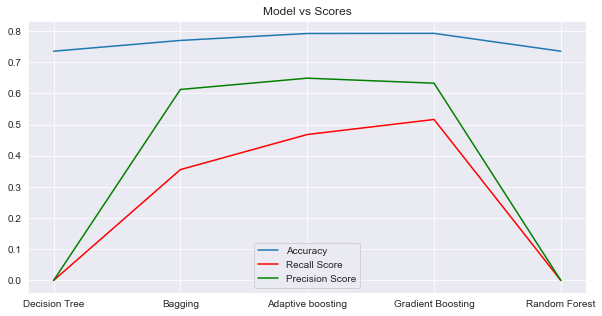

In [29]:
#Plotting for model vs Scores

f=plt.figure()
f.set_figwidth(10)
f.set_figheight(5)
plt.plot(scores['Model'],scores['Accuracy'],label = "Accuracy");
plt.plot(scores['Model'],scores['recall'],color='r',label = "Recall Score",);
plt.plot(scores['Model'],scores['Precision'],color='green',label = "Precision Score",);
plt.title('Model vs Scores');
plt.legend();

**Final Model choice**

**From the above figure and confusion matrix, we draw following conclusion:**





1. If we consider only the model accuracy as our model selection parameter, then our model of choice is Adaptive Boosting
2. If we do not consider the cost of large amount of time spend for model training we can select the Gradient Boosting as our final model because we can get a good accuracy of 79% where we are able to correctly classifying about 52% customers.
3. Decision tree and Random Forest cannot be considered for our model although these models take least model training time because we could classify only the customers who have stayed with the company and the model failed to classify the customers who actually left.
4. Bagging Model although with a decent accuracy failed to classify the maximum number of customers who actaully had left the company  yet the model was predicting them as the ones who were still with the company thereby giving overfit model.




Thus our final model choice is **Gradient Boosting**

**Improvements and Suggestions**

1. The dataset should also have contained other factors like salary or the customer last 3 renewal date of the plan, so that one could figure out the mindset of customer while he buys a plan and pays for his service.
2. There should also be a provision to find if the customer and his family are using services from same company or not from the dataset as this could lead to a trail of happy customership.
3. I strongly believe that the company should focus more on the fiber-optic provisions and providing services like digital tv and paid online services like online streaming, etc.
4. Majority of the customers prefer online billing and paperless approach seems more convient, so it'd be beneficial if the company could provide for some offers while transaction or renewal, it will certainly attract more customers and reduce churn.
5. Since the customers chose monthly packs more. The company could provide for seasonal discounts for annual subscription.